In [1]:
#Welcome! This a case study to see the correlation between the latitude of a country/region, measured against its performance in the olympics
#for this case study, I'll be using this historical dataset covering all of the olympic games 1896-2022
#I'll be using pandas to extract and manipulate the dataset into something I can use to make a scatter plot, using matplotlib.
#In the end, a trend line will be used to determine the correlation.
#expectation: there will be a general positive correlation between latitude and number of medal, with exception to countries with a high negative latitude.
#DISCLAIMER: Many of the teams in the dataset are either: 1. not soveriegn countries, but regional parts of a larger nation.
#2. The countries they represent do not exist anymore or aren't fully recognized as states
#3. Former territories that became independent, or countries that changed names (multiple NOCs can refer to a single country, just at a different
#point in time
#4. Some teams represent multiple countries (for those I put a rough estimate average latitude of the countries in question)
#5. some teams do not represent any country (their latitude is automatically set to 0)
#6.Special case: some athletes were put under the team NOC UNK, as it was unknown at the time what team they represent.
#Dataset source: https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018/data

In [2]:
#extract dataset
import pandas as pd

olymp = pd.read_csv("athlete_events.csv")
print(olymp.shape)
olymp.head(100)

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
96,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,NaN
97,33,Mika Lauri Aarnikka,M,28.0,187.0,76.0,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Men's Two Person Dinghy,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN


In [3]:
#get a series of unique NOC codes
#This is needed because I have to create a dataset for the latitudes
noc = pd.unique(olymp['NOC'])

noc_table = pd.DataFrame(data = {'NOC': noc})
print(noc_table)

     NOC
0    CHN
1    DEN
2    NED
3    USA
4    FIN
..   ...
225  TUV
226  NFL
227  KOS
228  SSD
229  LES

[230 rows x 1 columns]


In [4]:
#save table into a CSV file (commented out as it only needs to be done once)
#noc_table.to_csv('country_latitudes.csv', index=False)


#later, I took this .csv file and had to manually insert the latitude of every NOC's country.

In [5]:
#assuming the dataset is completed, it's extracted.
lat = pd.read_csv("country_latitudes.csv")
print(lat.head(10))

   NOC  Latitude
0  CHN      35.0
1  DEN      56.0
2  NED      52.5
3  USA      38.0
4  FIN      64.0
5  NOR      62.0
6  ROU      46.0
7  EST      59.0
8  FRA      46.0
9  MAR      32.0


In [6]:
#A simplified dataset was made to only include the NOC, total number of medals won per country (disregarding if it's gold, silver, or bronze).

olymp_simplified = olymp.groupby(['NOC'])['Medal'].count()
olymp_simplified = pd.DataFrame(olymp_simplified)

olymp_simplified.to_csv('olymp.csv', index=False)

#the two datasets are joined to include NOC, number of medals won, and the latitude
olymp_simplified = olymp_simplified.join(lat.set_index('NOC'), on='NOC')
print(olymp_simplified.head(10))

     Medal  Latitude
NOC                 
AFG      2     33.00
AHO      1     12.25
ALB      0     41.00
ALG     17     28.00
AND      0     42.50
ANG      0    -12.50
ANT      0     17.05
ANZ     29    -27.00
ARG    274    -34.00
ARM     16     40.00


'gradient of trendline: 7.219795'

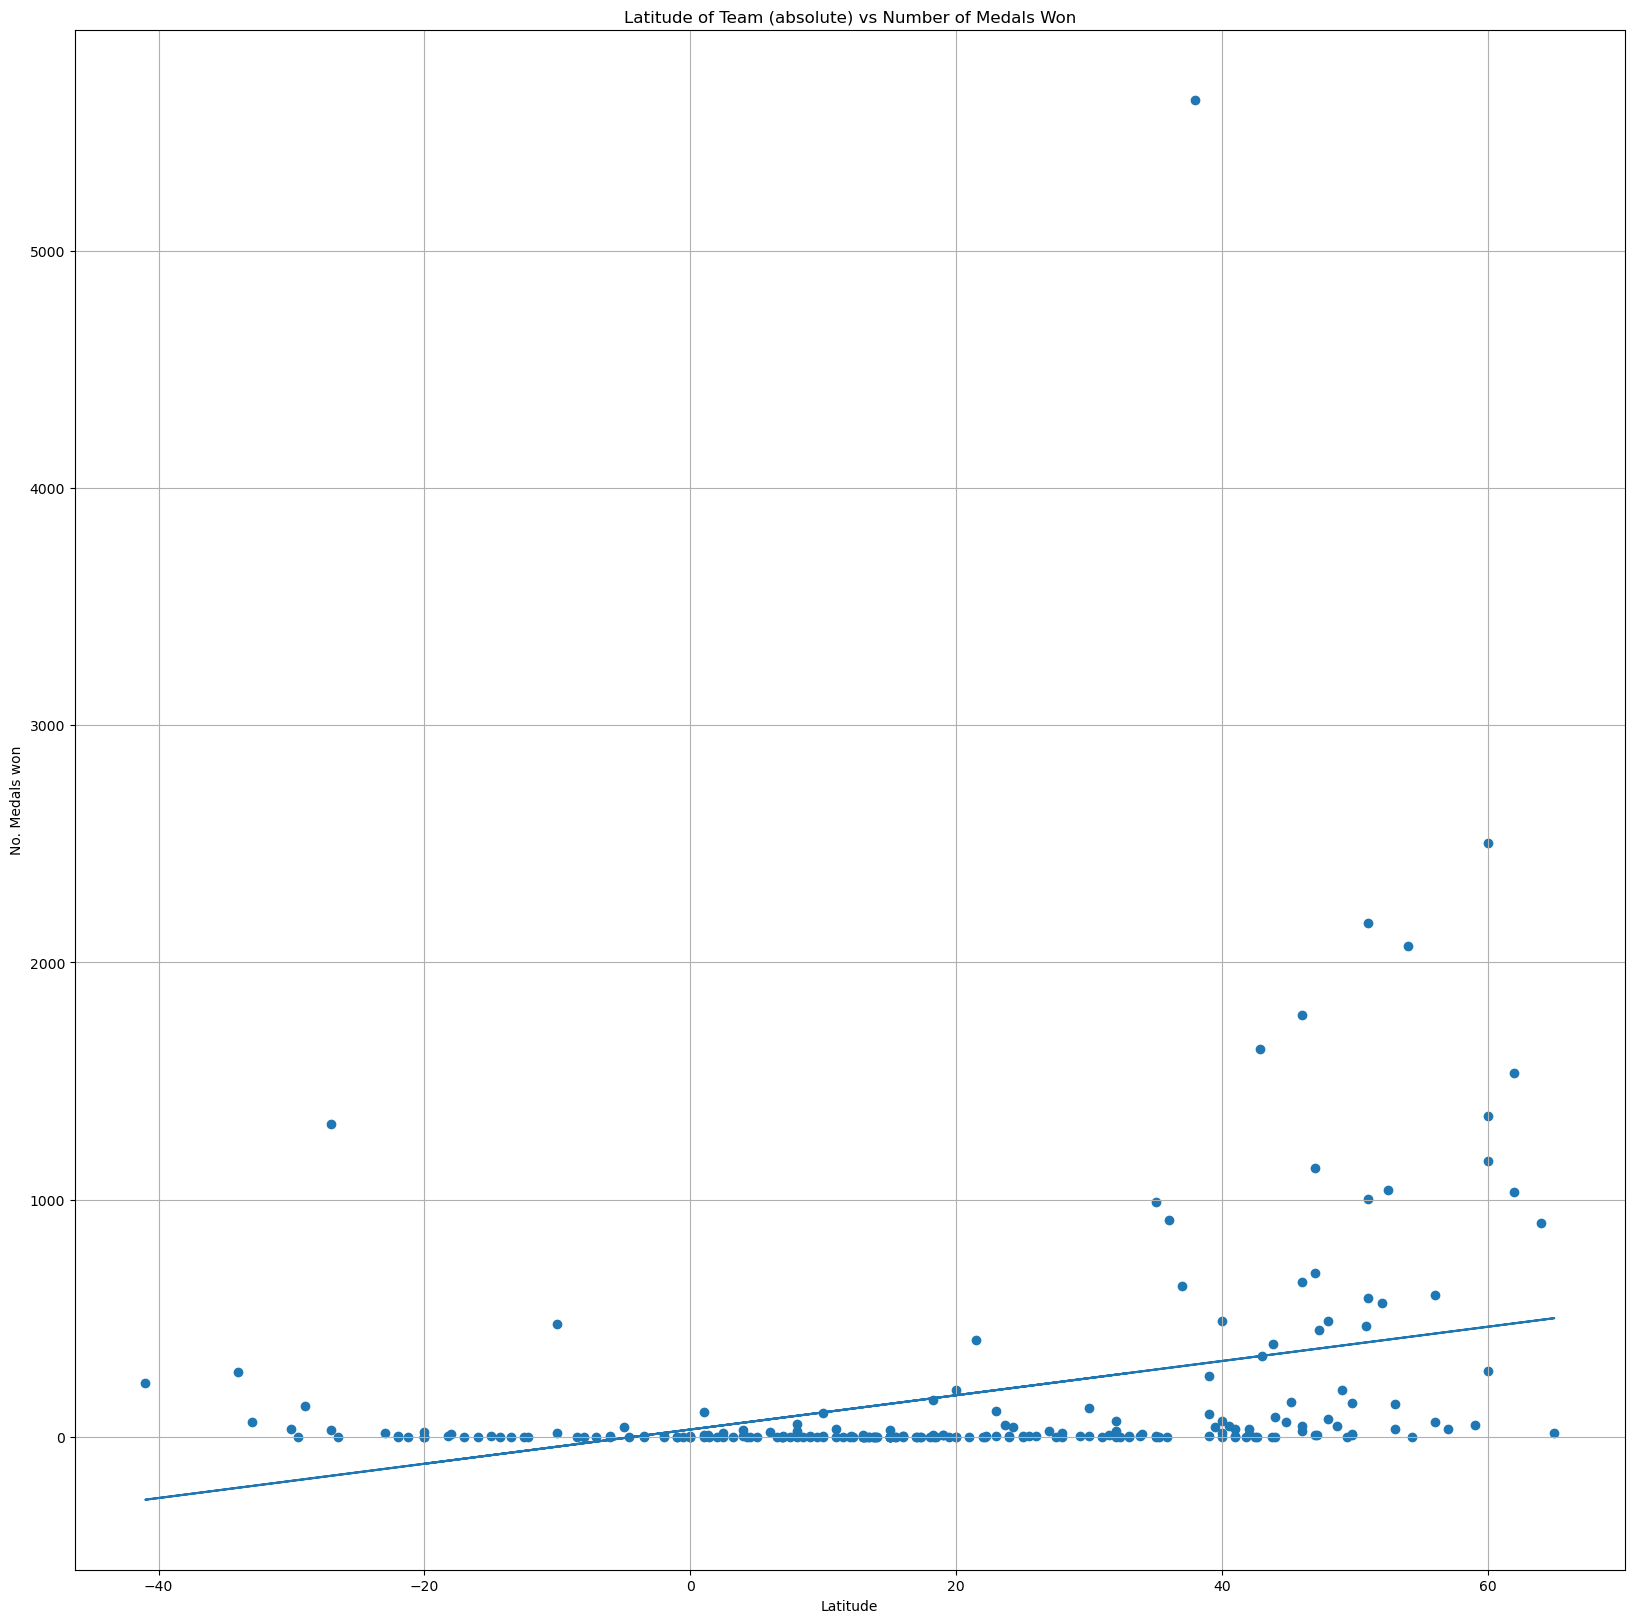

In [7]:
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(20,20))


plt.scatter(olymp_simplified['Latitude'], olymp_simplified['Medal'])
# Add labels, title, and grid
plt.xlabel("Latitude")
plt.ylabel("No. Medals won")
plt.title("Latitude of Team (absolute) vs Number of Medals Won")
plt.grid(True)

latitude = olymp_simplified['Latitude']
slope, intercept, rvalue, pvalue, stderror = stats.linregress(latitude, olymp_simplified['Medal'])


plt.plot(olymp_simplified['Latitude'], (slope*latitude)+intercept)

"gradient of trendline: %f"%(slope)

In [8]:
#This confirms my hyposthesis. In general, the higher in latitude north the country is, the more medals it's likely to win, with an average
#of 7.21 more medals won for every latitude degree increase.
#Of course, this is expected, since most of the world's most developed countries tend to be more northern, which means they can invest more into
#their athletes, with the exception of some very southern countries that tend to be on the higher end of development.
#We can find another perspective by graphing the plot again, but the abolsute values of latitude (distance from equator)

'gradient of trendline: 12.209986'

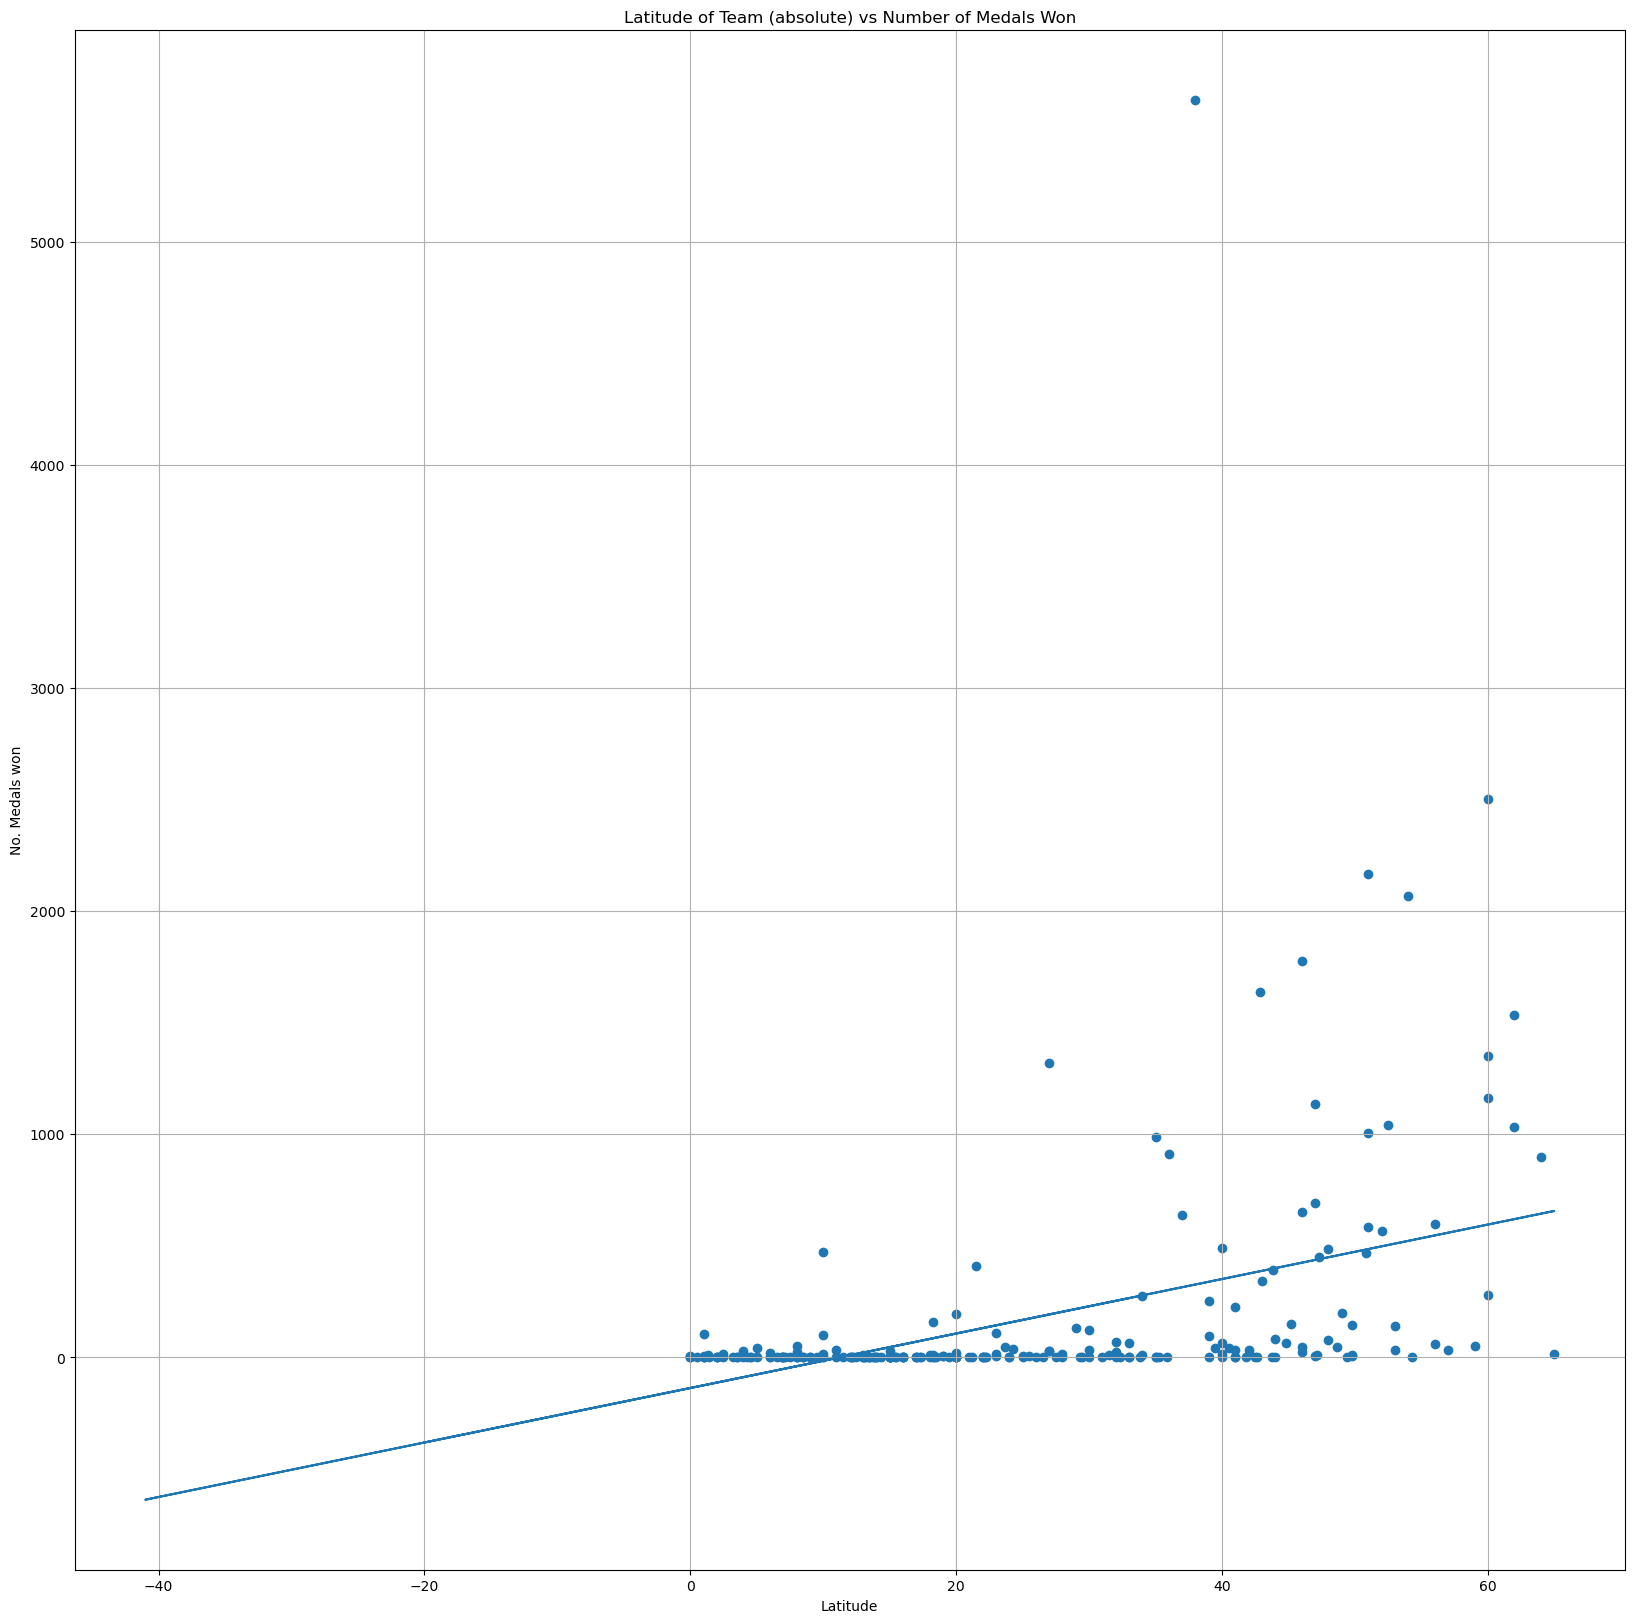

In [9]:
plt.figure(figsize=(20,20))


plt.scatter(olymp_simplified['Latitude'].abs(), olymp_simplified['Medal'])
# Add labels, title, and grid
plt.xlabel("Latitude")
plt.ylabel("No. Medals won")
plt.title("Latitude of Team (absolute) vs Number of Medals Won")
plt.grid(True)

absolute_latitude = olymp_simplified['Latitude'].abs()
slope, intercept, rvalue, pvalue, stderror = stats.linregress(absolute_latitude, olymp_simplified['Medal'])


plt.plot(olymp_simplified['Latitude'], (slope*olymp_simplified['Latitude'])+intercept)

"gradient of trendline: %f"%(slope)

In [10]:
#The gradient went up to 12.21!